# Cognitive Neuroscience: Group Project

## Worksheet 1 - sinusoids

Marijn van Wingerden, Department of Cognitive Science and Artificial Intelligence – Tilburg University Academic Year 21-22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22}) # we want stuff to be visible

In this worksheet, we will start working with sinusoids. (co)Sine waves are the basic element of the Fourier analysis - basically we will be looking at the *overlap* between a cosine wave of a particular frequency with a particular segment of data. The amount of overlap determines the presence of that cosine wave in the signal, and we call this the **spectral power** of the signal at that frequency.

### Sinusoids
Oscillations are periodical signals, and can be created from sinusoids with np.sin and np.cos. There are a couple of basic features that make up a sinus (see the lab intro presentation):
- frequency
- phase offset (theta)
- amplitude
these parameters come together in the following lines of code:

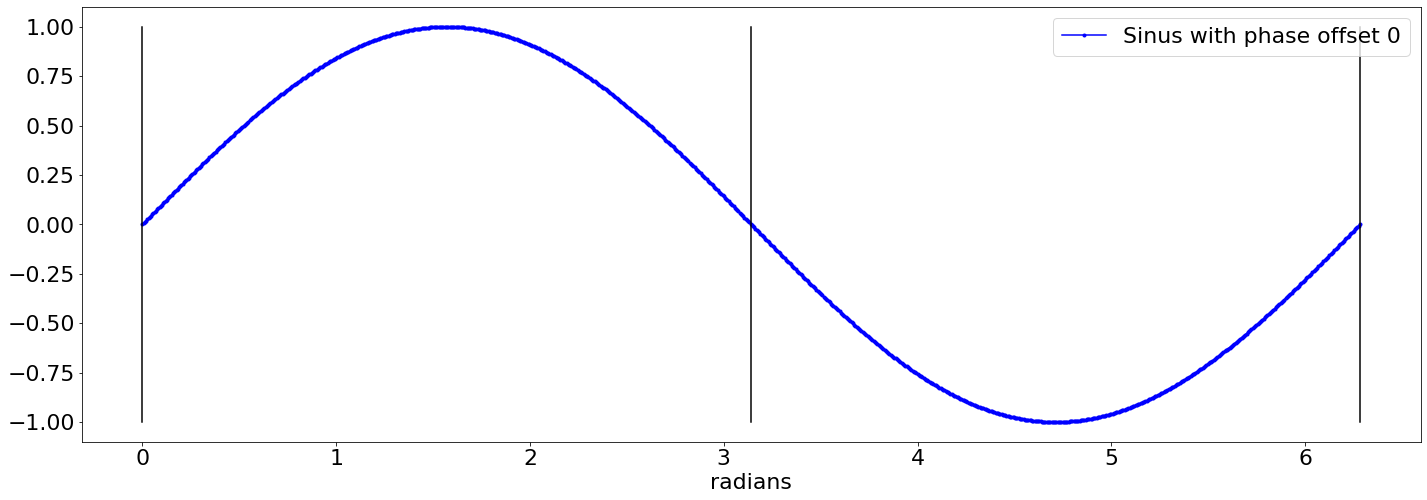

In [2]:
## simulation parameters single sine
sin_freq = 1 # frequency of the oscillation, default is 1 Hz -> one cycle per second
theta = 0*np.pi/4 # phase offset (starting point of oscillation), set by default to 0, adjustable in 1/4 pi steps
amp = 1 # amplitude, set by default to 1, so the sine is bounded between [-1,1] on the y-axis

# one full cycle is completed in 2pi. 
# We are putting 1000 steps in between
time  = np.linspace(start = 0, num = 1000, stop = 2*np.pi) 

# we create the signal by taking the 1000 timesteps, shifted by theta (0 for now) and taking the sine value
signal = amp*np.sin(time + theta)

fig, ax = plt.subplots(figsize=(24,8))
ax.plot(time,signal,'b.-', label='Sinus with phase offset 0')

# we know that at 0, pi and 2pi the sine wave crosses 0. Let's mark these points
# a line plot uses plot([x1,x2], [y1,y2]). When we plot vertical, x1 == x2
# 'k' is the marker for plotting in black
ax.plot(0*np.array([np.pi, np.pi]), [-1,1], 'k')
ax.plot(1*np.array([np.pi, np.pi]), [-1,1], 'k')
ax.plot(2*np.array([np.pi, np.pi]), [-1,1],'k')
ax.set_xlabel('radians')

ax.legend()
plt.show()

We can take the example a bit further by making some adjustments. First, we normalize time in such a way that [0,1] on time always means [0,2pi] in the signal creation. We can them redefine time as going from [0,1] and define the _sampling rate_ as 1000, taking steps of 1/srate, so 1/1000, meaning we still have 1000 samples:
0, 0.001, 0.002 ... 0.999 

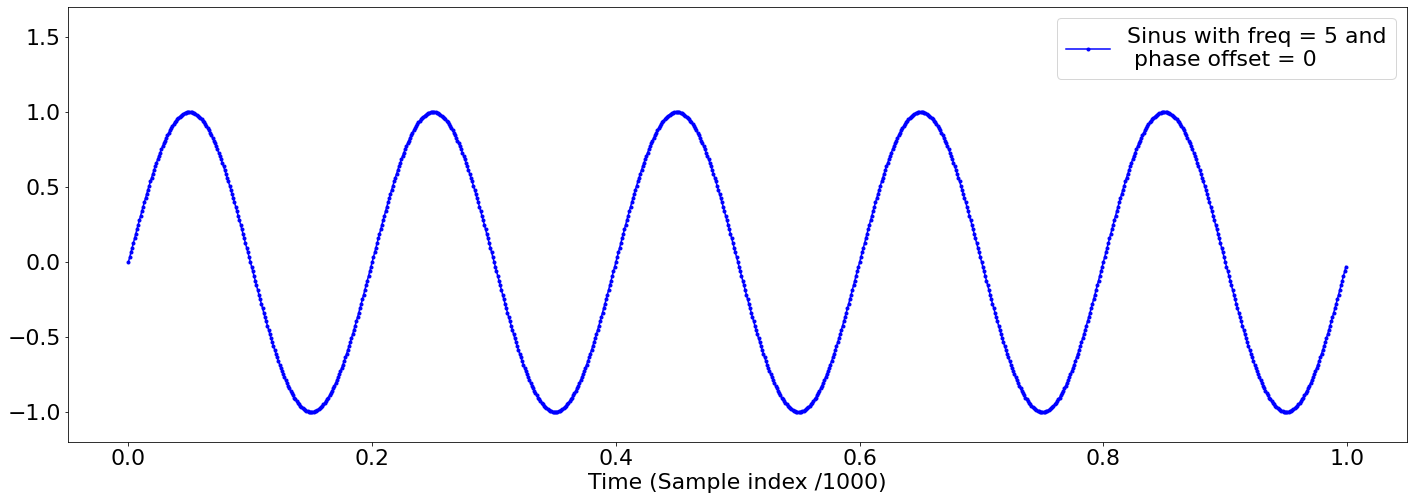

In [3]:
## simulation parameters
sin_freq = 5 # frequency of the oscillation
theta = 0*np.pi/4 # phase offset (starting point of oscillation)
amp = 1 # amplitude

srate = 1000 # defined in Hz: samples per second.
time  = np.arange(start = 0, step = 1/srate, stop = 1)
signal = amp*np.sin(2*np.pi*sin_freq*time + theta)

fig, ax = plt.subplots(figsize=(24,8))
ax.plot(time,signal,'b.-', label='Sinus with freq = 5 and\n phase offset = 0')
ax.set_xlabel('Time (Sample index /1000)')
ax.set_ylim([-1.2,1.7]) # make some room for the legend
ax.legend()
plt.show()

In its most basic form with a frequency of 1 and no offset, this would plot a single sinus over the time interval [0,1]. As time gets multiplied by 2\*pi, we are scaling the time axis to the interval [0,2pi], so one sinus. Theta is a time offset (that also gets multiplied to 2pi), so this offset makes only sense in the [0:2pi] interval, as after that the sinus is back where it started. In this example, we choose negative time offsets; you can think of these as time _lags_ , so all signals follow the blue one with a certain delay in time:

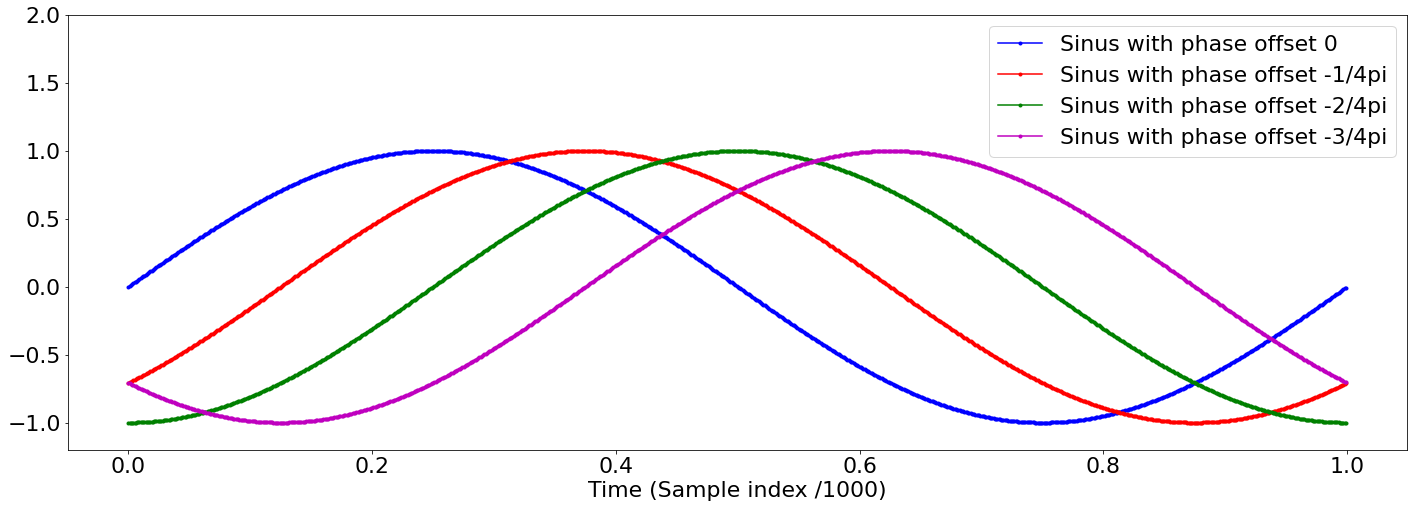

In [4]:
## simulation parameters
sin_freq = 1 # frequency of the oscillation
theta0 = 0*np.pi/4 # phase offset (starting point of oscillation)
theta1 = -1*np.pi/4 # phase offset (1/4 pi)
theta2 = -2*np.pi/4 # phase offset (2/4 pi)
theta3 = -3*np.pi/4 # phase offset (3/4 pi)
amp = 1 # amplitude

srate = 1000 # defined in Hz: samples per second.
time  = np.arange(start = 0, step = 1/srate, stop = 1)

signal0 = amp*np.sin(2*np.pi*sin_freq*time + theta0)
signal1 = amp*np.sin(2*np.pi*sin_freq*time + theta1)
signal2 = amp*np.sin(2*np.pi*sin_freq*time + theta2)
signal3 = amp*np.sin(2*np.pi*sin_freq*time + theta3)
# could we have done this in a loop? of course, but let's keep it simple for now

fig, ax = plt.subplots(figsize=(24,8))
ax.plot(time,signal0,'b.-', label='Sinus with phase offset 0')
ax.plot(time,signal1,'r.-', label='Sinus with phase offset -1/4pi')
ax.plot(time,signal2,'g.-', label='Sinus with phase offset -2/4pi')
ax.plot(time,signal3,'m.-', label='Sinus with phase offset -3/4pi')
ax.set_xlabel('Time (Sample index /1000)')
ax.set_ylim([-1.2,2]) # make some room for the legend
ax.legend()
plt.show()

Building from this, lets add a few sinuses with different frequencies. We will do this by pre-generating a list of frequencies, and plotting them inside a 'for' loop

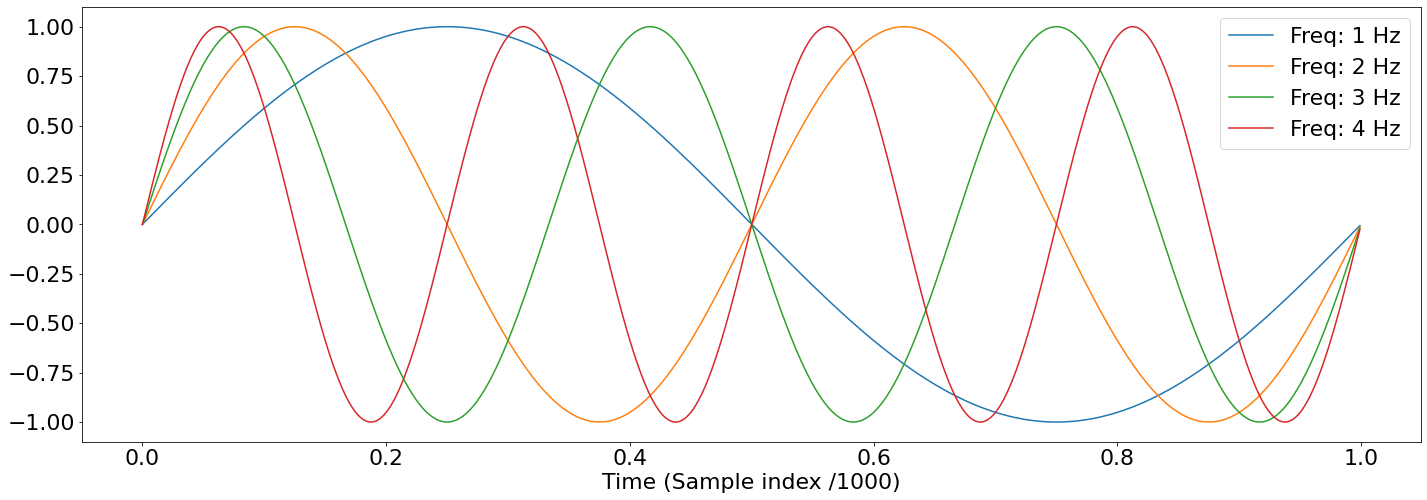

In [5]:
# pre-specify a list of frequencies
freqs = np.arange(start = 1, stop = 5)
theta = 0*np.pi/4 # phase offset (starting point of oscillation)
amp = 1 # amplitude
srate = 1000 # defined in Hz: samples per second.
time  = np.arange(start = 0, step = 1/srate, stop = 1)

#open a new plot
fig, ax = plt.subplots(figsize=(24,8))
        
for iFreq in freqs:
    signal = np.sin(2*np.pi*iFreq*time + theta);
    sin_label = "Freq: {} Hz"
    ax.plot(time, signal, label = sin_label.format(iFreq)) 
ax.legend()
ax.set_xlabel('Time (Sample index /1000)')
plt.show()

## Exercises 

Exercise 1:
- Using a loop, create a plot for a 2 Hz oscillation, but now with 4 different phase offsets. Try 0, 0.5pi, 1pi, 1.5pi for example
    - set up "thetas" as a vector of theta values
    - loop over thetas
    - recalculate "signal" in each loop iteration
    - plot to the ax in each iteration
        - add a formatted label to each sine plot
- prettify according to taste

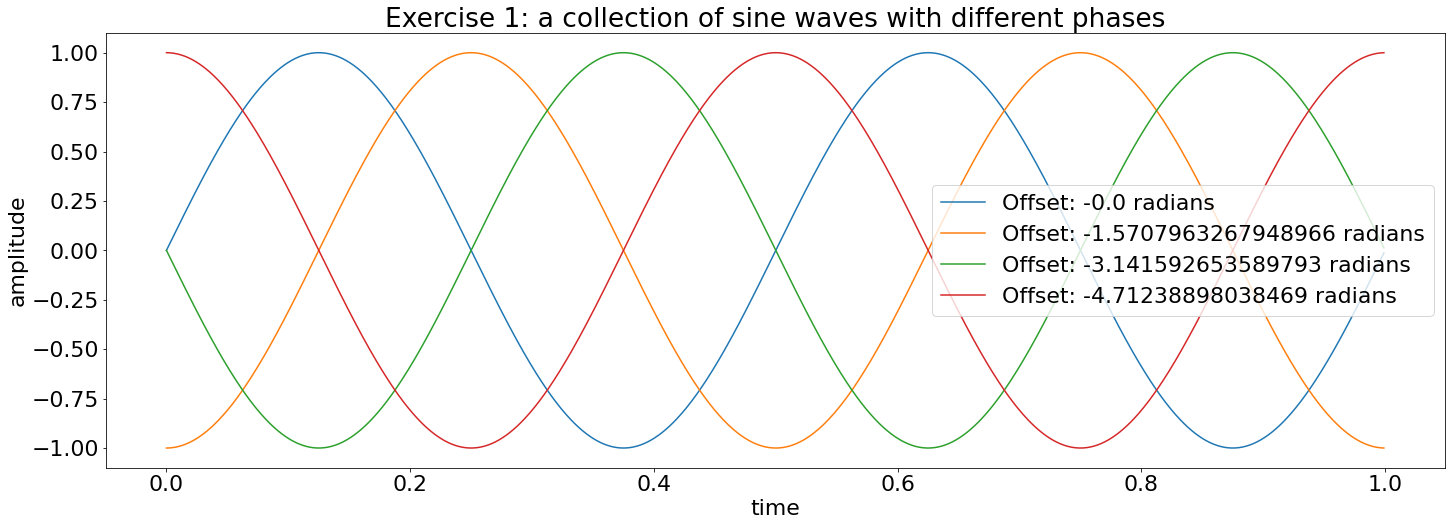

In [6]:
##
## Your answer here
## 

thetas = -np.arange(start = 0, step = 0.5, stop = 2)*np.pi
freq = 2

fig, ax = plt.subplots(figsize=(24,8))


for iTheta in thetas:
    signal = np.sin(2*np.pi*freq*time + iTheta);
    sin_label = "Offset: {} radians"
    ax.plot(time, signal, label = sin_label.format(iTheta)) 

plt.title('Exercise 1: a collection of sine waves with different phases')
ax.set_ylabel('amplitude')
ax.set_xlabel('time')
ax.legend()
plt.show()

Exercise 2:
- pre-allocate an empty matrix with 3 rows and 1000 colums
- per row, fill this matrix with the signal for an oscillation:
    - Plot a series of 3 oscillations that differ in frequency AND phase offset
    - find the intersection points for the pairs of oscillations (1,2), (1,3), (2,3)
        - define the intersection points as a boolean [ix12] that is true when the difference between e.g. sine1 and sine2 is smaller than 0.05 and false otherwise
        - use the intersection index boolean to extract the time points belonging to these points (time[ix12])
        - similarily, define ix13 and ix23
    - plot vertical lines on these intersection points (using ax.plot([time[ix12], time[ix12]],[-1, 1],'k')

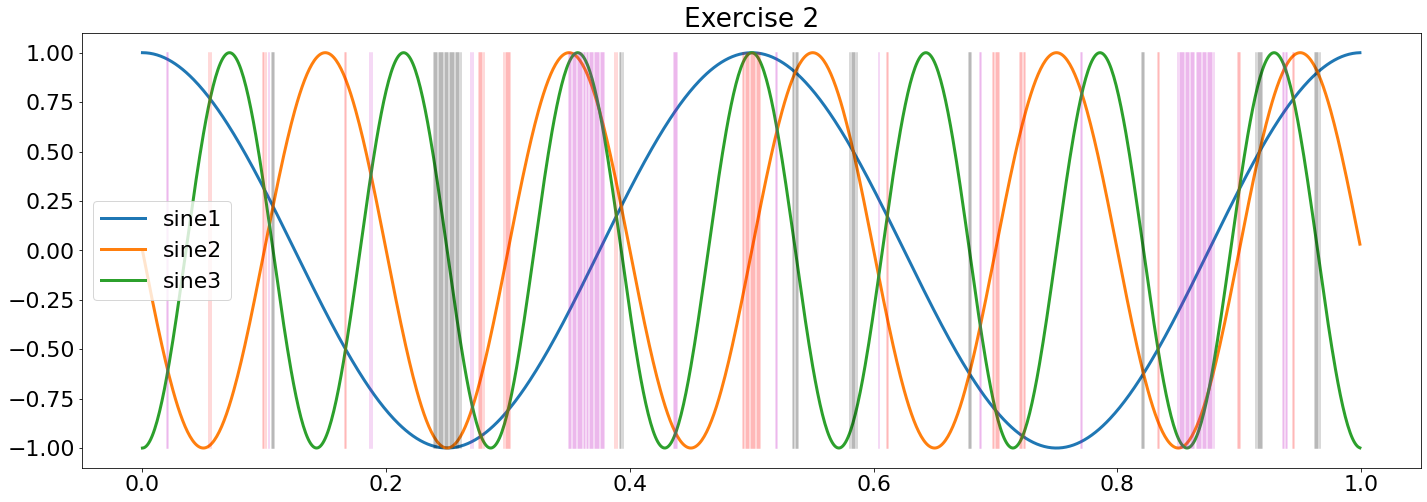

In [7]:
##
## Your answer here
## 


freq_mat = np.zeros((3,1000))

freqs = np.array([2,5,7])
thetas = np.array([0.5, 1, 1.5])*np.pi

fig, ax = plt.subplots(figsize=(24,8))
plt.title('Exercise 2')

for iMat in range(freq_mat.shape[0]):
    freq_mat[iMat,:] = np.sin(2*np.pi*freqs[iMat]*time + thetas[iMat])


ax.plot(time, np.transpose(freq_mat), linewidth=3)
ax.legend(['sine1', 'sine2', 'sine3'])
# it is necessary to transpose the matrix to line up the dimensions 
# between time and the sine matrix


ix_one_two = np.abs(freq_mat[0,:] - freq_mat[1,:]) < 0.05
ax.plot([time[ix_one_two], time[ix_one_two]], [-1,1], 'k', alpha = 0.2) 
# black lines: sine 1 & sine 2 intersect

ix_one_three = np.abs(freq_mat[0,:] - freq_mat[2,:]) < 0.05
ax.plot([time[ix_one_three], time[ix_one_three]], [-1,1], 'r', alpha = 0.2) 
# red lines: sine 1 & sine 3 intersect

ix_two_three = np.abs(freq_mat[1,:] - freq_mat[2,:]) < 0.05
ax.plot([time[ix_two_three], time[ix_two_three]], [-1,1], 'm', alpha = 0.2) 
# magenta lines: sine 2 & sine 3 intersect




plt.show()


This concludes the exercises for Lab 1